In [1]:
#Boombikes is a US bike sharing provider who wishes to understand which factors affects the demand of the bikes. 
#And if they can determine future demand predictions.
#The main problem statements
#Which variables are significant in predicting the demand for shared bikes.
#How well those variables describe the bike demands

# Importing and Understanding Data

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataframe
df = pd.read_csv("5.day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#inspecting the elements of the dataframe
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#dropping unecessary columnns
df = df.drop(['dteday', 'instant', 'mnth', 'holiday','weekday','workingday','casual', 'registered', 'atemp','yr'], axis=1)
df.head()

,season,weathersit,temp,hum,windspeed,cnt
0,1,2,14.110847,80.5833,10.749882,985
1,1,2,14.902598,69.6087,16.652113,801
2,1,1,8.050924,43.7273,16.636703,1349
3,1,1,8.200000,59.0435,10.739832,1562
4,1,1,9.305237,43.6957,12.522300,1600


# Visualising Dataframe

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

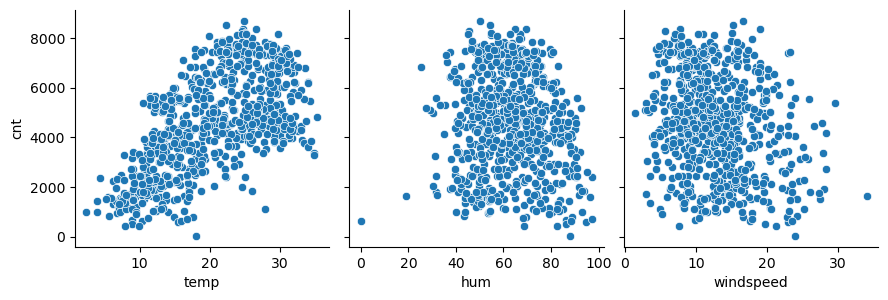

In [9]:
sns.pairplot(df, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt',size=3, aspect=1, kind='scatter')
plt.show()

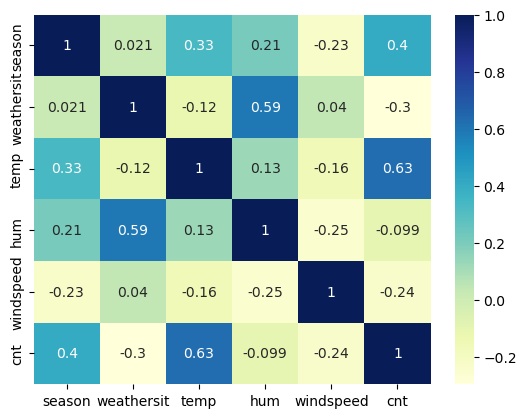

In [10]:
#Let's see the correlation between these variables through a heatmap as well
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Linear Regression Analysis

In [11]:
#Let's first import statsmodels for analysis
import statsmodels.api as sm

In [37]:
X = df['temp']
y = df['cnt']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     471.7
Date:                Wed, 17 May 2023   Prob (F-statistic):           5.07e-81
Time:                        22:27:29   Log-Likelihood:                -6377.9
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     728   BIC:                         1.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1222.0403    161.278      7.577      0.0

In [12]:
#Let's assign the x and the y for the OLS Regression results of 'temp'
X = df['temp']
y = df['cnt']

In [13]:
# We will split the variable to training and testing sets in a 70:30 ratio.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
#Adding a constant for the intercept
X_train_sm = sm.add_constant(X_train)
#Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [15]:
#Printing the Summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 17 May 2023   Prob (F-statistic):           5.80e-61
Time:                        22:14:12   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1088.0439    191.181      5.691      0.0

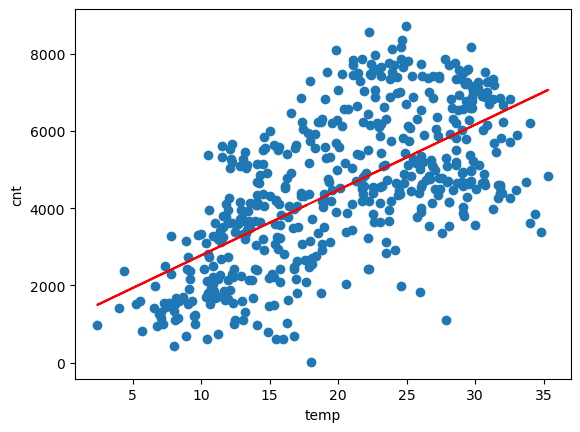

In [16]:
#Drawing a scatter graph with the linear regression equation we have obtained from the summary
plt.scatter(X_train, y_train)
plt.plot(X_train, 1088.0439 + 169.0511*X_train, 'r')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

In [17]:
#Now going to look at the residuals for all the variables
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

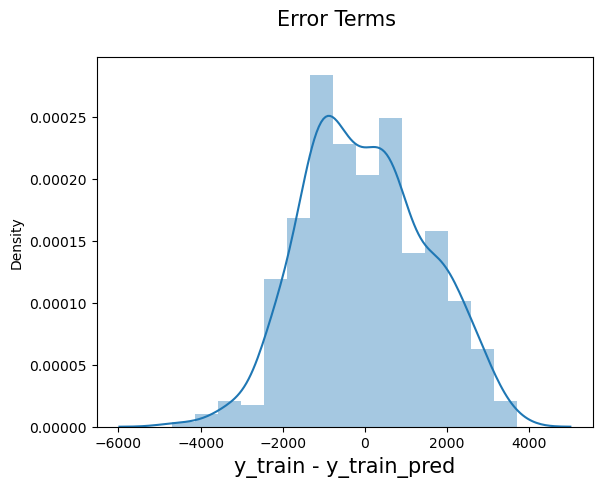

In [18]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

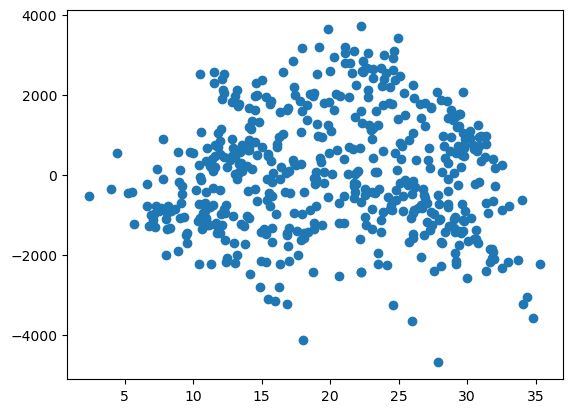

In [19]:
plt.scatter(X_train,res)
plt.show()

In [38]:
X = df['season']
y = df['cnt']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 17 May 2023   Prob (F-statistic):           4.01e-30
Time:                        22:27:58   Log-Likelihood:                -6495.0
No. Observations:                 730   AIC:                         1.299e+04
Df Residuals:                     728   BIC:                         1.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2745.1239    161.587     16.988      0.0

In [20]:
#for 'season'
X = df['season']
y = df['cnt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     88.18
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.00e-19
Time:                        22:14:12   Log-Likelihood:                -4546.5
No. Observations:                 510   AIC:                             9097.
Df Residuals:                     508   BIC:                             9105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2786.4475    197.862     14.083      0.0

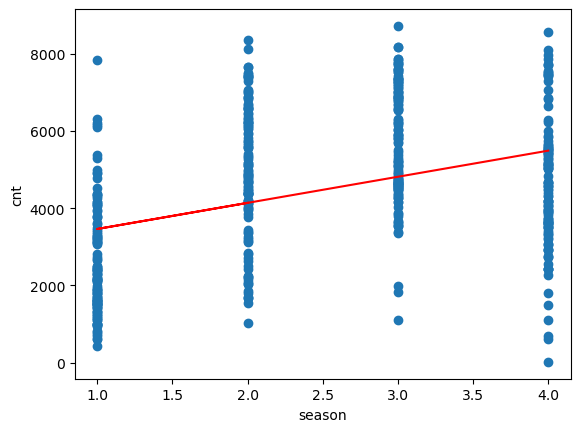

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2786.4475 + 675.2078*X_train, 'r')
plt.xlabel('season')
plt.ylabel('cnt')
plt.show()

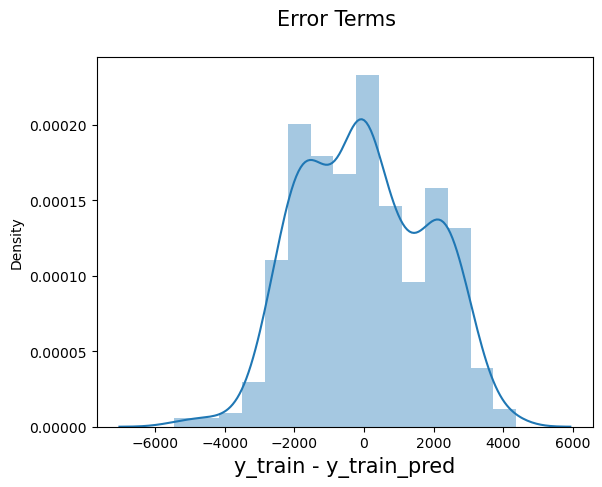

In [22]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

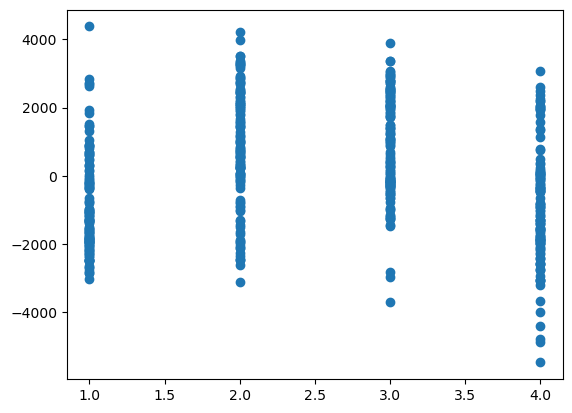

In [23]:
plt.scatter(X_train,res)
plt.show()

In [24]:
#for 'weathersit'
X = df['weathersit']
y = df['cnt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     47.47
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.66e-11
Time:                        22:14:12   Log-Likelihood:                -4564.5
No. Observations:                 510   AIC:                             9133.
Df Residuals:                     508   BIC:                             9141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5947.5767    227.654     26.125      0.0

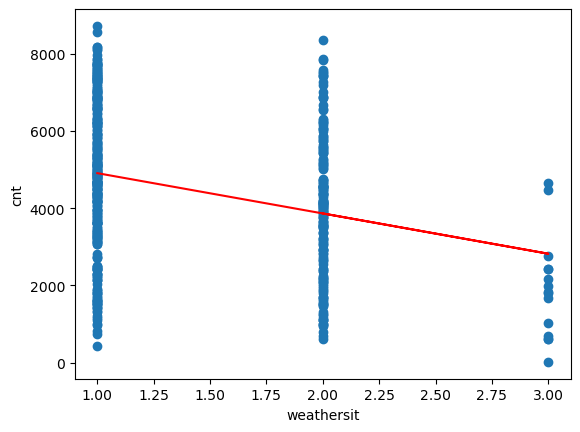

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 5947.5767 + (-1042.2505)*X_train, 'r')
plt.xlabel('weathersit')
plt.ylabel('cnt')
plt.show()

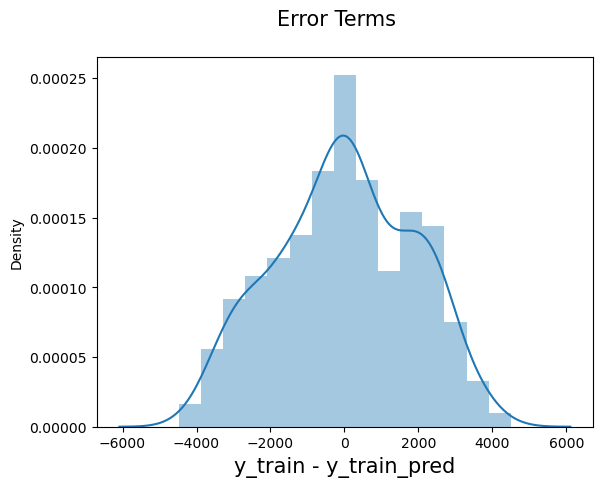

In [26]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

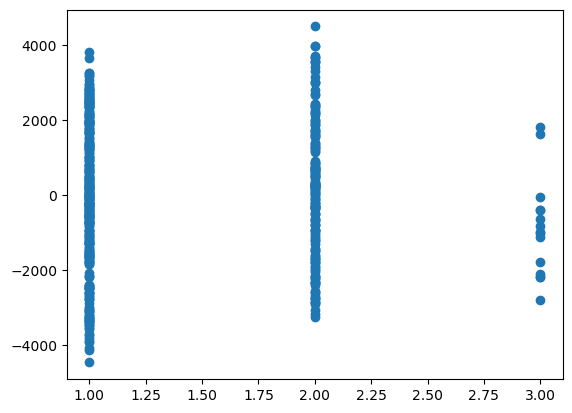

In [27]:
plt.scatter(X_train,res)
plt.show()

In [28]:
#for 'hum'
X = df['hum']
y = df['cnt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.835
Date:                Wed, 17 May 2023   Prob (F-statistic):              0.176
Time:                        22:14:13   Log-Likelihood:                -4586.4
No. Observations:                 510   AIC:                             9177.
Df Residuals:                     508   BIC:                             9185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5008.5098    395.001     12.680      0.0

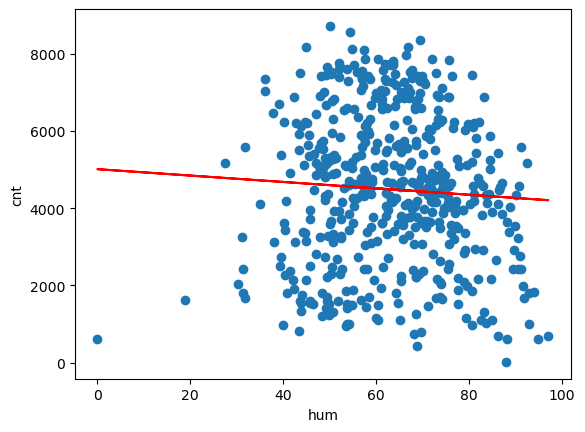

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 5008.5098 + (-8.2729)*X_train, 'r')
plt.xlabel('hum')
plt.ylabel('cnt')
plt.show()

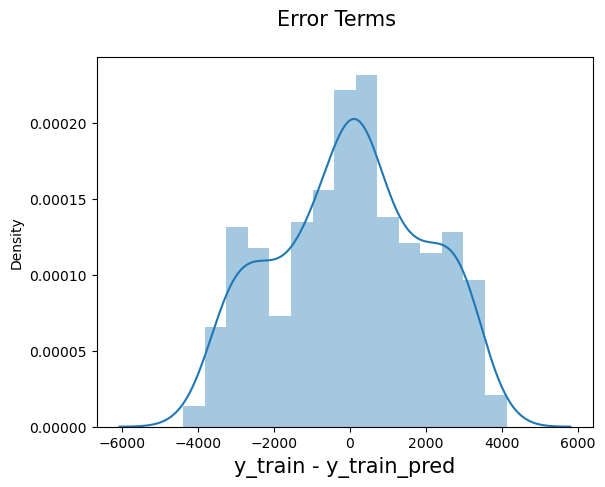

In [30]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

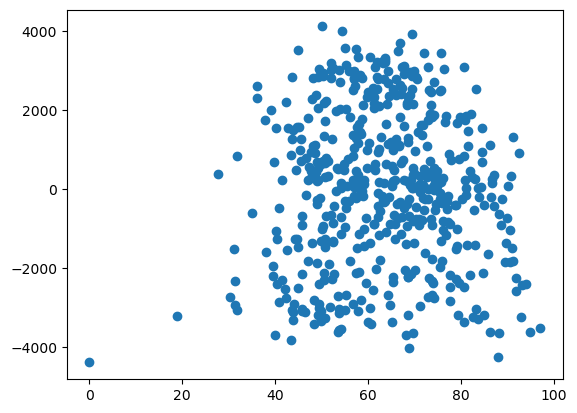

In [31]:
plt.scatter(X_train,res)
plt.show()

In [32]:
#for 'windspeed'
X = df['windspeed']
y = df['cnt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     34.97
Date:                Wed, 17 May 2023   Prob (F-statistic):           6.14e-09
Time:                        22:14:13   Log-Likelihood:                -4570.3
No. Observations:                 510   AIC:                             9145.
Df Residuals:                     508   BIC:                             9153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5687.7099    219.704     25.888      0.0

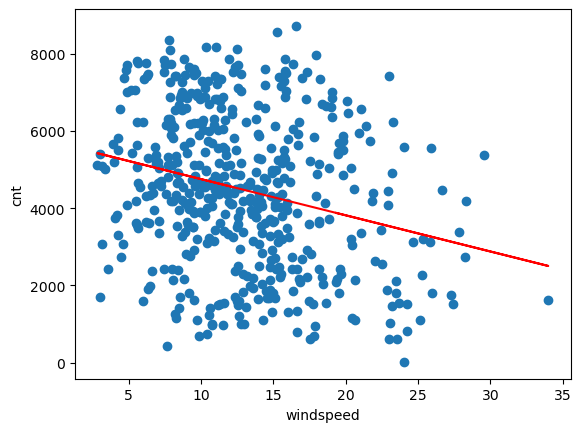

In [33]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 5687.7099 + (-93.6246)*X_train, 'r')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.show()

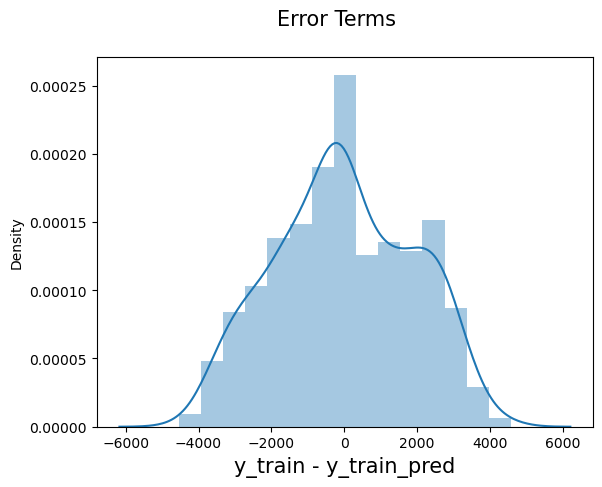

In [34]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

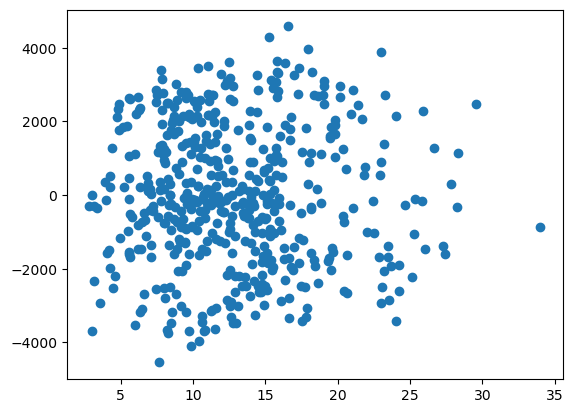

In [35]:
plt.scatter(X_train,res)
plt.show()

In [36]:
X = df[['hum','weathersit','windspeed','season','temp']]
y = df['cnt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     112.9
Date:                Wed, 17 May 2023   Prob (F-statistic):           6.81e-80
Time:                        22:14:13   Log-Likelihood:                -4395.7
No. Observations:                 510   AIC:                             8803.
Df Residuals:                     504   BIC:                             8829.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3286.2233    394.035      8.340      0.0